### Name: 
**Sajith Gowthaman**

### Course:
**THINKFUL, Data Science Flex.**

### Project Name:
Final Capstone - Predicting COVID-19 using Convolutional Neural Networks and Forecasting COVID-19 using ARIMA and FB Prophet.

### Description:
COVID-19: A novel coronavirus is a new strain of coronavirus that has not been previously identified in humans.
Coronaviruses (CoV) are a large family of viruses transmitting between animals and people that cause illness ranging from the common cold to more severe diseases such as Middle East respiratory syndrome (MERS-CoV) and severe acute respiratory syndrome (SARS-CoV).

As the virus is wild spread, it is the duty of data scientists and enthusiasts to provide the health care industry with useful insights.


![unnamed](https://user-images.githubusercontent.com/55968160/80875853-be49fd80-8c6f-11ea-8ded-75588694181d.png)


The project is split into two parts:
1) Classifying the chest x-ray image using Convolutional Neural Network with Keras.
2) Forecasting the positive cases for New York using using FB Prophet & ARIMA for all the 50 states.

The data for predicting the chest x-rays are taking from an open base research dataset on a [github repository]('https://github.com/ieee8023/covid-chestxray-dataset') where I was able to access 340+ (Augmented to about 3k+ images) Covid-19 chest xray images. I took a bunch of normal x-rays found on Kaggle to do this analysis.

The [data]('https://covidtracking.com/') for predicting the positive cases is taken from the "The Covid-19 Tracking Project". This is a real time data (uploaded on a daily basis). This part of the project will include useful insights, grouped statewise to find solutions through record of improvement. 

### How is this project different and who will it help?
A lot of people have been using their time off to visualize the covid-19 which is really useful. 
This project will combine the unique idea of both predicting the positive cases and predicting the presence of the virus through classifying chest x-ray. This will ease the work load on health care workers to assume the present of covid-19 without waiting 3 days for the test results. The patient could be treated as a victim of covid-19 if the deep learning model predicts positive, atleast till the clinical results come out.

### Final Capstone Project - Part 1

Predicting COVID-19 with Keras and Convulational Neural Network Algorithms.

### Introduction:

As mentioned above, I will use an open reasearch database from github that provides chest x-ray images of covid-19 patients and combine another dataset that contains chest x-rays of normal patients. Then I will create a dataframe that has the images and it's corresponding labels for training, validating and testing.

The training data were about 3000 (after augmenting), the validation and training were about 300 each (real world data).

The training dataset were increased by manual augmentation, which generated about 1700 CoV images and Image Data Generator for automatic augmentation during training.

**Workflow Pipeline:**
* The pictures are first pre processed, reshaped to 64x64x3 for feeding it into the model
* We will move in the direction of the pipeline starting  from convolutional layer, Maxpooling, Batch  Normalization, fully connected layer output
* VGG-16: This is proven pre-trained model, whose weights and activations can be used in other models.

**The model architecture is as follows:**
* Visible input layer of image size 64x64x3 (width x height x rgb) and kernel size 3x3 
* Activation - “Relu” which defines the output of a neuron to either 0 or better value. 
* Regularizers - Kernel regularizer - L2(0.01) - which penalizes the weight to get better fit.
* Padding - Two types: “Valid” which will reduce the size and  “Same” preserves the size.
* MaxPooling - Reducing the dimension, while preserving the most important aspects.
* Filter size: Filters are used to recognize and learn the patterns, which is moved by strides (1,1).
* Output layer with “Softmax” activation to get the output in the form of probability.


### Contents:
* Pre-Processing and Labeling
* Visualization
* ImageDataGenerator
* CNN Architecture
* VGG-16
* Fitting Model
* Train and Test Results
* Predictions
* Confusion Matrix
* Conclusion

In [1]:
#pandas, numpy, matplotlib, seaborn, scipy, sklearn libraries
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn import preprocessing
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
import plotly.figure_factory as ff
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
#Image imports
from PIL import Image
from pathlib import Path
from skimage.io import imread
import cv2
from sklearn.metrics import confusion_matrix
#Keras

import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import Dense, Dropout, Flatten, Input, ZeroPadding2D
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import regularizers
from keras import optimizers
from keras.models import load_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import missingno as msno

#Predictions using ARIMA
from statsmodels.tsa.arima_model import ARIMA
from tqdm import tqdm

#FB Prophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

os.chdir("..")
warnings.filterwarnings('ignore')
matplotlib.style.use("fivethirtyeight")

Using TensorFlow backend.
/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a 

In [2]:
data_dir = Path('../chest_xray2')
train_dir = data_dir / 'train'
val_dir = data_dir / 'val'
test_dir = data_dir / 'test'

In [3]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'normal/'
covid19_cases_dir = train_dir / 'covid19/'

types = ('*.jpg', '*.jpeg', '*.png') # the tuple of file types
normal_cases = []
covid19_cases =[]
for files in types:
    normal_cases.extend(normal_cases_dir.glob(files))
    covid19_cases.extend(covid19_cases_dir.glob(files))

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in covid19_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,../chest_xray2/train/covid19/augmented_image_1...,1
1,../chest_xray2/train/normal/NORMAL2-IM-0930-00...,0
2,../chest_xray2/train/covid19/augmented_image_1...,1
3,../chest_xray2/train/covid19/augmented_image_9...,1
4,../chest_xray2/train/covid19/augmented_image_3...,1


1    1746
0    1215
Name: label, dtype: int64


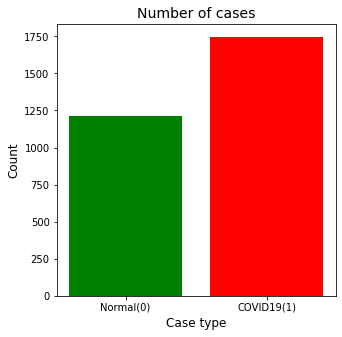

In [4]:
%matplotlib inline
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(5,5))
plt.bar(cases_count.index, cases_count.values, color='rg')
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'COVID19(1)'])
plt.show()

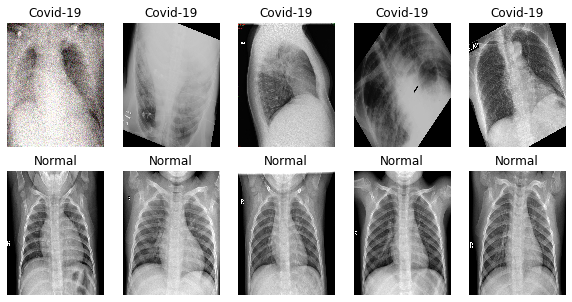

In [5]:
# Get few samples for both the classes
covid19_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = covid19_samples + normal_samples
del covid19_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(10,5))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Covid-19")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [6]:
#Validation dats
#Get the path to the normal and covi-19 sub-directories
normal_cases_dir = val_dir / 'normal/'
covid19_cases_dir = val_dir / 'covid19/'

types = ('*.jpg', '*.jpeg', '*.png') # the tuple of file types
normal_cases = []
covid19_cases =[]
for files in types:
    normal_cases.extend(normal_cases_dir.glob(files))
    covid19_cases.extend(covid19_cases_dir.glob(files))

# List that are going to contain validation images data and the corresponding labels
valid_data = []
valid_labels = []

# Some images are in grayscale while majority of them contains 3 channels. So, if the image is grayscale, we will convert into a image with 3 channels.
# We will normalize the pixel values and resizing all the images to 64x64 

# Normal cases
for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64))
    if img.shape[2] ==1: #for gray scale hxwxrgb, we are converting it to a RGB version
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
                      
# Pneumonia cases        
for img in covid19_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
    
# Convert the list into numpy arrays
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

print("Total number of validation examples: ", valid_data.shape)
print("Total number of labels:", valid_labels.shape)

Total number of validation examples:  (426, 64, 64, 3)
Total number of labels: (426, 2)


In [7]:
import imgaug.augmenters as iaa
# Augmentation sequence 
seq = iaa.OneOf([
    iaa.Fliplr(), # horizontal flips
    iaa.Affine(rotate=20), # roatation
    iaa.Multiply((1.2, 1.5))]) #random brightness

In [8]:
def data_gen(data, batch_size):
    # Get total number of samples in the data
    n = len(data)
    steps = n//batch_size
    
    # Define two numpy arrays for containing batch data and labels
    batch_data = np.zeros((batch_size, 64, 64, 3), dtype=np.float32)
    batch_labels = np.zeros((batch_size,2), dtype=np.float32)

    # Get a numpy array of all the indices of the input data
    indices = np.arange(n)
    
    # Initialize a counter
    i =0
    while True:
        np.random.shuffle(indices)
        # Get the next batch 
        count = 0
        next_batch = indices[(i*batch_size):(i+1)*batch_size]
        for j, idx in enumerate(next_batch):
            img_name = data.iloc[idx]['image']
            label = data.iloc[idx]['label']
            
            # one hot encoding
            encoded_label = to_categorical(label, num_classes=2)
            # read the image and resize
            img = cv2.imread(str(img_name))
            img = cv2.resize(img, (64,64))
            
            # check if it's grayscale
            if img.shape[2]==1:
                img = np.dstack([img, img, img])
            
            # cv2 reads in BGR mode by default
            orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # normalize the image pixels
            orig_img = img.astype(np.float32)/255.
            
            batch_data[count] = orig_img
            batch_labels[count] = encoded_label
            
            # generating more samples of the undersampled class
            if label==0 and count < batch_size-2:
                aug_img1 = seq.augment_image(img)
                aug_img2 = seq.augment_image(img)
                aug_img1 = cv2.cvtColor(aug_img1, cv2.COLOR_BGR2RGB)
                aug_img2 = cv2.cvtColor(aug_img2, cv2.COLOR_BGR2RGB)
                aug_img1 = aug_img1.astype(np.float32)/255.
                aug_img2 = aug_img2.astype(np.float32)/255.

                batch_data[count+1] = aug_img1
                batch_labels[count+1] = encoded_label
                batch_data[count+2] = aug_img2
                batch_labels[count+2] = encoded_label
                count +=2
            
            else:
                count+=1
            
            if count==batch_size-1:
                break
            
        i+=1
        yield batch_data, batch_labels
            
        if i>=steps:
            i=0

In [9]:
visible = Input(shape=(64,64,3))
conv1 = Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(visible)
conv2 = Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(conv1)
bat1 = BatchNormalization()(conv2)
zero1 = ZeroPadding2D(padding=(1, 1))(bat1)

conv3 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05))(zero1)
conv4 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05))(conv3)
bat2 = BatchNormalization()(conv4)

conv5 = Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid')(bat2)
conv6 = Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid')(conv5)
bat3 = BatchNormalization()(conv6)
pool1 = MaxPooling2D(pool_size=(2, 2))(bat3)
zero2 = ZeroPadding2D(padding=(1, 1))(pool1)

conv7 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01))(zero2)
conv8 = Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid')(conv7)
bat4 = BatchNormalization()(conv8)

conv9 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(bat4)
conv10 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(conv9)
bat5 = BatchNormalization()(conv10)

conv11 = Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1, 1))(bat5)
conv12 = Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1, 1))(conv11)
bat6 = BatchNormalization()(conv12)
pool2 = MaxPooling2D(pool_size=(2, 2))(bat6)

conv13 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(pool2)
conv14 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(conv13)
bat7 = BatchNormalization()(conv14)

conv15 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05))(bat7)
conv16 = Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid')(conv15)
bat8 = BatchNormalization()(conv16)

flat = Flatten()(bat8)
hidden1 = Dense(32, activation='relu')(flat)
drop1 = Dropout(0.2)(hidden1)

hidden2 = Dense(32, activation='relu')(hidden1)
drop2 = Dropout(0.5)(hidden2)

output = Dense(2, activation='softmax')(drop2)
model = Model(inputs=visible, outputs=output)

In [10]:
model.compile(optimizer= 'adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
Callbacks=[EarlyStopping(patience=3, restore_best_weights=True), 
           ReduceLROnPlateau(patience=2)]    

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 16)        64        
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 58, 58, 32)        9248

In [11]:
import h5py
# Open the VGG16 weight file
f = h5py.File('../chest_xray2/vgg/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', 'r')

# Select the layers for which you want to set weight.

w,b = f['block1_conv1']['block1_conv1_W_1:0'], f['block1_conv1']['block1_conv1_b_1:0']
model.layers[1].set_weights = [w,b]

w,b = f['block1_conv2']['block1_conv2_W_1:0'], f['block1_conv2']['block1_conv2_b_1:0']
model.layers[2].set_weights = [w,b]

w,b = f['block2_conv1']['block2_conv1_W_1:0'], f['block2_conv1']['block2_conv1_b_1:0']
model.layers[4].set_weights = [w,b]

w,b = f['block2_conv2']['block2_conv2_W_1:0'], f['block2_conv2']['block2_conv2_b_1:0']
model.layers[5].set_weights = [w,b]

f.close()
model.summary() 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 16)        64        
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 58, 58, 32)        9248

In [12]:
batch_size = 32
nb_epochs = 20

# Get a train data generator
train_data_gen = data_gen(data=train_data, batch_size=batch_size)

# Define the number of training steps
nb_train_steps = train_data.shape[0]//batch_size

print("Number of training and validation steps: {} and {}".format(nb_train_steps, len(valid_data)))

Number of training and validation steps: 92 and 426


In [13]:
#Fit the model
history = model.fit_generator(train_data_gen, epochs=nb_epochs, steps_per_epoch=nb_train_steps,
                               validation_data=(valid_data, valid_labels),callbacks= Callbacks, verbose=1)

Epoch 1/20
92/92 [==============================] - 102s 1s/step - loss: 11.4310 - accuracy: 0.7833 - val_loss: 9.2062 - val_accuracy: 0.4930
Epoch 2/20
92/92 [==============================] - 100s 1s/step - loss: 7.0667 - accuracy: 0.8927 - val_loss: 6.6479 - val_accuracy: 0.5070
Epoch 3/20
92/92 [==============================] - 97s 1s/step - loss: 4.6503 - accuracy: 0.9042 - val_loss: 4.9105 - val_accuracy: 0.5070
Epoch 4/20
92/92 [==============================] - 104s 1s/step - loss: 3.1739 - accuracy: 0.9066 - val_loss: 3.4702 - val_accuracy: 0.5070
Epoch 5/20
92/92 [==============================] - 102s 1s/step - loss: 2.2112 - accuracy: 0.9110 - val_loss: 2.7137 - val_accuracy: 0.5211
Epoch 6/20
92/92 [==============================] - 102s 1s/step - loss: 1.5421 - accuracy: 0.9256 - val_loss: 1.7556 - val_accuracy: 0.6925
Epoch 7/20
92/92 [==============================] - 102s 1s/step - loss: 1.1695 - accuracy: 0.8995 - val_loss: 1.1670 - val_accuracy: 0.8028
Epoch 8/20
92

**Few ways in which we improved the test accuracy from 50% to 98%:**
* Using weighted regularization to keep the weights as low as possible for better generalization, we used kernel_regularizer=regularizers.l2(0.05.
* Increasing training set, we did that by rotating, flipping and adding noise.
* Randomly substituting some pixels with black and white - this cannot be applied here as we only use black and white pixels for chest xrays
* Experimented with various neruons and input.
* Pre-trained the model using VGG-16 from h5py package which forces the model to extract the useful aspects of the image.

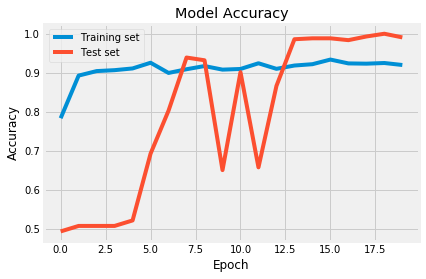

In [14]:
import matplotlib
matplotlib.style.use("fivethirtyeight")
# Accuracy
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

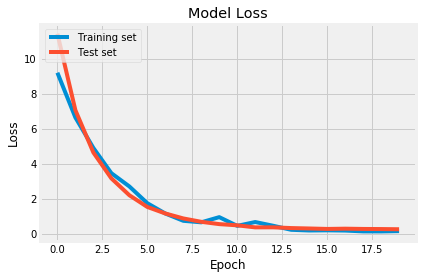

In [15]:
# Loss
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [16]:
# import numpy as np
# import cv2
# from skimage import io 
# from skimage.transform import rotate, AffineTransform, warp
# import random
# from skimage import img_as_ubyte
# import os
# from skimage.util import random_noise
# #Lets define functions for each operation
# def anticlockwise_rotation(image):
#     angle= random.randint(0,180)
#     return rotate(image, angle)

# def clockwise_rotation(image):
#     angle= random.randint(0,180)
#     return rotate(image, -angle)

# def h_flip(image):
#     return  np.fliplr(image)

# def v_flip(image):
#     return np.flipud(image)

# def add_noise(image):
#     return random_noise(image)

In [17]:
# transformations = {'rotate anticlockwise': anticlockwise_rotation,
#                       'rotate clockwise': clockwise_rotation,
#                       'horizontal flip': h_flip, 
#                       'vertical flip': v_flip,
#                    'adding noise': add_noise,
#                  }                #use dictionary to store names of functions 

# images_path='../chest_xray/chest_xray2/images' #path to original images
# augmented_path="../chest_xray/chest_xray2/train covid19" # path to store aumented images
# images=[] # to store paths of images from folder

# for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
#     images.append(os.path.join(images_path,im))

# images_to_generate=2000  #you can change this value according to your requirement
# i=1                        # variable to iterate till images_to_generate

# while i<=images_to_generate:    
#     image=random.choice(images)
#     original_image = io.imread(image,plugin='matplotlib')
#     transformed_image=None
# #     print(i)
#     n = 0       #variable to iterate till number of transformation to apply
#     transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
#     while n <= transformation_count:
#         key = random.choice(list(transformations)) #randomly choosing method to call
#         transformed_image = transformations[key](original_image)
#         n = n + 1
        
#     new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
#     transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
#     transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
#     cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
#     i =i+1

In [18]:
#Test data
# Get the path to the normal and covi-19 sub-directories
normal_cases_dir = test_dir / 'normal/'
covid19_cases_dir = test_dir / 'covid19/'

types = ('*.jpg', '*.jpeg', '*.png') # the tuple of file types
normal_cases = []
covid19_cases =[]
for files in types:
    normal_cases.extend(normal_cases_dir.glob(files))
    covid19_cases.extend(covid19_cases_dir.glob(files))

test_data = []
test_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    test_data.append(img)
    test_labels.append(label)
                      
for img in covid19_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    test_data.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data)
test_labels = np.array(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (284, 64, 64, 3)
Total number of labels: (284, 2)


In [19]:
# Evaluation on test dataset
test_loss, test_score = model.evaluate(test_data, test_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

284/284 [==============================] - 2s 5ms/step
Loss on test set:  0.2762023758300593
Accuracy on test set:  0.9190140962600708


In [20]:
# Get predictions
preds = model.predict(test_data, batch_size=16)
preds = np.argmax(preds, axis=-1)

# Original labels
orig_test_labels = np.argmax(test_labels, axis=-1)

print(orig_test_labels.shape)
print(preds.shape)

(284,)
(284,)


In [21]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

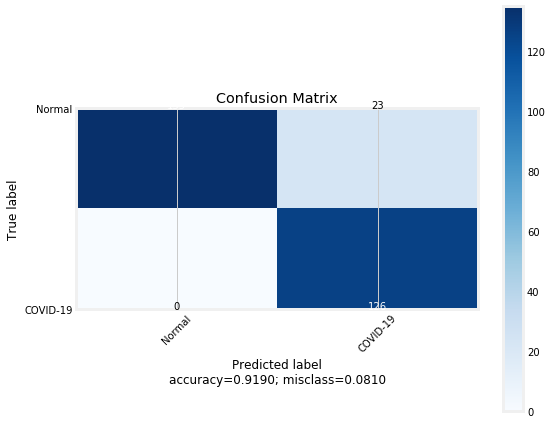

Recall of the model is 1.00
Precision of the model is 0.85
[[135  23]
 [  0 126]]


In [22]:
# Get the confusion matrix
confusion  = confusion_matrix(orig_test_labels, preds)
plot_confusion_matrix(cm=confusion, target_names = ['Normal', 'COVID-19'], title = 'Confusion Matrix',normalize=False)


# Calculate Precision and Recall
tn, fp, fn, tp = confusion.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print(confusion)

**Its better to have less false negative, because youre not diagnosing someone with covid-19 as normal.**

Prediction for test data containing covid-images:

In [23]:
#Test data
#Get the path to the normal and covi-19 sub-directories
covid19_cases_dir = test_dir / 'covid19/'

types = ('*.jpg', '*.jpeg', '*.png') # the tuple of file types

covid19_cases =[]
for files in types:
    covid19_cases.extend(covid19_cases_dir.glob(files))

test_data1 = []
test_labels = []
                      
for img in covid19_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    test_data1.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data1)
test_labels = np.array(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (126, 64, 64, 3)
Total number of labels: (126, 2)


In [24]:
#Predictions
preds = model.predict(test_data, batch_size=16)
preds = np.argmax(preds, axis=-1)
for i in preds:
    if preds[i] == [1]:
        print('COVID-19 Positive')
    elif preds[i] == [0]:
        print('COVID-19 Negative')

COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 Positive
COVID-19 P

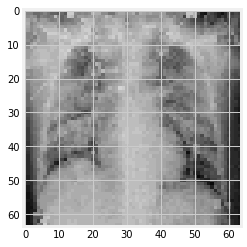

(1, 64, 64, 3)


In [25]:
from keras.preprocessing import image
img_path = '../chest_xray2/test/covid19/radiol.2020200274.fig3d.png'
img = image.load_img(img_path, target_size=(64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

The model has predicted that the above xray image contains covid-19, which is true. 

**Conclusion for part-1**

* The Convolutional Neural Network was built using 16 convolutional layers, 2 hidden layer.
* The activation for the last layer used was 'softmax', with the remaining layers using 'relu'.
* Each convolutional layer was associated with batch normalization to improve the performance through recentering and rescaling.
* Padding was introduced to the layers to determine the amount of pixels to be added and with kernal regularizer, which is basically used in place of weight regularizer to work on the weights used in each layer.
* The model was optimized using 'adam' in order to find the individual learning rate of each parameter. The model was fitted with a pre-trained model - VGG16 for better training accuracy.
* The cross entropy was calculated to find performance, it increases as the predicted value is far away from true labels.
* The train and test accuracy were: 93% and 97% respectively
* The loss associated with the model: 27% loss was encountered.

### Part-2 

Forecasting positive cases using ARIMA and FB Prophet.

**Data Structure and Aim:**

* We will be taking forecasting the positive cases using ARIMA and FB Prophet
* For vis
ualization, the top 10 states that are affected are taken.
* This is a time series data, consisting of records since the beginning of  outspread (January 2020). 

### CONTENT
* EDA 
* Data Preprocessing
* Data Cleaning
* Pivoting, Subsetting
* Visualizations using Seaborn and Matplotlib
* Forecasting Positive Cases using ARIMA
* Forecasting Positive Cases using FB Prophet
* Visualizing Predictions
* Conclusions

In [2]:
#DataFrame for the COVID-19 Tracking
df = pd.read_csv("https://covidtracking.com/api/states/daily.csv")

In [3]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200513,AK,383.0,30266.0,NaN,12.0,NaN,NaN,NaN,NaN,...,NaN,30649,30649,30649,2,0.0,0.0,688.0,0.0,688.0
1,20200513,AL,10617.0,125755.0,NaN,NaN,1317.0,NaN,477.0,NaN,...,1317.0,136372,136372,136372,1,20.0,30.0,2847.0,307.0,3154.0
2,20200513,AR,4164.0,69051.0,NaN,59.0,497.0,NaN,NaN,12.0,...,497.0,73215,73215,73215,5,0.0,12.0,2771.0,0.0,2771.0
3,20200513,AS,0.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,105,105,105,60,0.0,0.0,0.0,0.0,0.0
4,20200513,AZ,12176.0,115574.0,NaN,755.0,1590.0,292.0,NaN,191.0,...,1590.0,127750,127750,127750,4,32.0,26.0,4468.0,440.0,4908.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881 entries, 0 to 3880
Data columns (total 27 columns):
date                        3881 non-null int64
state                       3881 non-null object
positive                    3866 non-null float64
negative                    3692 non-null float64
pending                     734 non-null float64
hospitalizedCurrently       1606 non-null float64
hospitalizedCumulative      1565 non-null float64
inIcuCurrently              830 non-null float64
inIcuCumulative             334 non-null float64
onVentilatorCurrently       672 non-null float64
onVentilatorCumulative      110 non-null float64
recovered                   1449 non-null float64
dataQualityGrade            2775 non-null object
lastUpdateEt                3508 non-null object
hash                        3881 non-null object
dateChecked                 3881 non-null object
death                       3155 non-null float64
hospitalized                1565 non-null float64
total

**Visualization**

In [5]:
#Visualization
top_10 = df.sort_values('total',ascending = False).drop_duplicates(['state'])
top_10.state.head(10)

37    NY
5     CA
10    FL
47    TX
16    IL
34    NJ
21    MA
24    MI
41    PA
46    TN
Name: state, dtype: object

For visualization, we will use the top 10 states with the highest number of cases. 

**The states with the highest number of cases are NY, CA, FL, TX, MA, NJ, IL, PA, MI, WA**

In [6]:
vis_df = df.loc[df['state'].isin(['NY','CA', 'FL', 'TX', 'MA', 'NJ', 'IL', 'PA', 'MI', 'WA'])]
## Reset Index
vis_df = vis_df.reset_index(drop=True)
vis_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200513,CA,71141.0,994451.0,NaN,4545.0,NaN,1314.0,NaN,NaN,...,NaN,1065592,1065592,1065592,6,87.0,0.0,30463.0,1759.0,32222.0
1,20200513,FL,42402.0,552361.0,1191.0,NaN,7835.0,NaN,NaN,NaN,...,7835.0,595954,594763,594763,12,49.0,181.0,14680.0,479.0,15159.0
2,20200513,IL,84698.0,404661.0,NaN,4563.0,NaN,1208.0,NaN,714.0,...,NaN,489359,489359,489359,17,191.0,0.0,15991.0,1677.0,17668.0
3,20200513,MA,80497.0,329535.0,NaN,3101.0,8032.0,794.0,NaN,NaN,...,8032.0,410032,410032,410032,25,174.0,190.0,7371.0,1165.0,8536.0
4,20200513,MI,48391.0,259869.0,NaN,1384.0,NaN,693.0,NaN,525.0,...,NaN,308260,308260,308260,26,40.0,0.0,0.0,370.0,370.0


In [7]:
#Grouping statewise for current positive cases
vis_df1 = vis_df.copy()
vis_df1.date = pd.to_datetime(vis_df['date'], format='%Y%m%d')
vis_df1.date = vis_df1.date.max()
count_df = vis_df1.groupby(by=['date','state'])['positive'].max().reset_index()
count_df.sort_values('positive', ascending=False, inplace=True)
count_df = pd.DataFrame(count_df)
count_df

,date,state,positive
6,2020-05-13,NY,340661.0
5,2020-05-13,NJ,141560.0
2,2020-05-13,IL,84698.0
3,2020-05-13,MA,80497.0
0,2020-05-13,CA,71141.0
7,2020-05-13,PA,58698.0
4,2020-05-13,MI,48391.0
8,2020-05-13,TX,42403.0
1,2020-05-13,FL,42402.0
9,2020-05-13,WA,17330.0


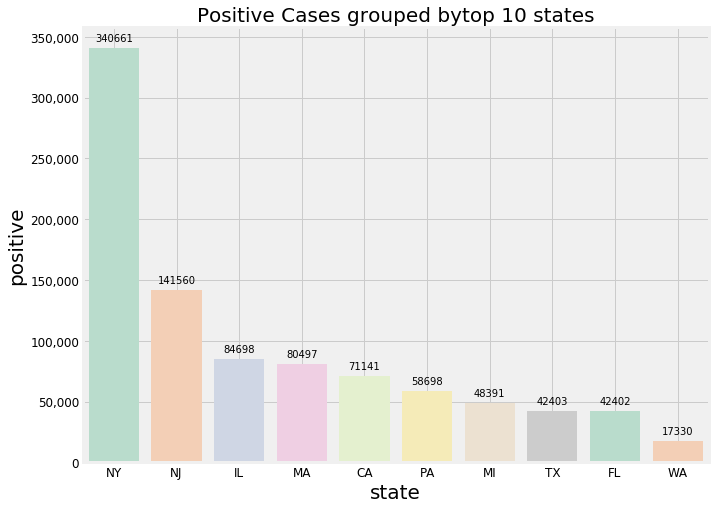

In [8]:
#Barplot for Positive Cases
from matplotlib.ticker import StrMethodFormatter
f, ax = plt.subplots(figsize=(10, 8))
splot = sns.barplot(x=count_df.state, y=count_df.positive, 
            label="Positive counts by state",  ax=ax, 
           palette="Pastel2",
           )
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.grid(axis='x')
ax.set_title("Positive Cases grouped bytop 10 states", loc='center', fontsize=20)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

New York and New Jersey has over 450,000 positive cases in total as of 10th May.

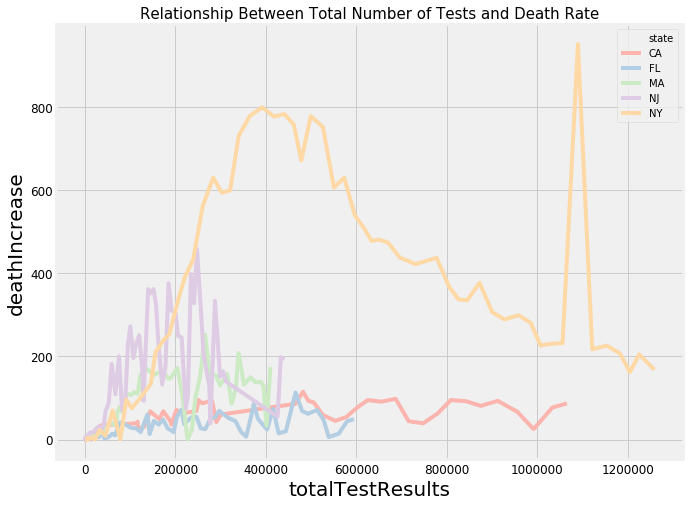

In [9]:
#Lineplot for Relationship Between Total Number of Tests and Death Rate
f, ax = plt.subplots(figsize=(10, 8))
df_lineplot = df.loc[df['state'].isin(['NY','CA', 'FL', 'NJ', 'MA'])]
ax = sns.lineplot(x="totalTestResults", 
                   y="deathIncrease", hue='state', data=df_lineplot, palette='Pastel1')
ax.set_title('Relationship Between Total Number of Tests and Death Rate', size=15)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

We could see that as the number of tests increase, the death rate is falling down. Ofcourse, there will be significant number of positive cases as there are more tests taken, but it drastically reduces the death rate. This is because as more number of tests are taken, the victims know their status and can carry out preventive measures from having the virus spread. The -200 death increase at Philadelphia means that there are no death increase but rather increased recovery.

As the test increases, the recovery increases. This could mean that those who were tested positive are quarantined reducing the risks of spreading it further. With increase in tests, the number of cases will eventually increase, but the rate of death will comparatively be lesser. We could check which state has recovered the most and follow their way of lifestyle to flatten the curve. 

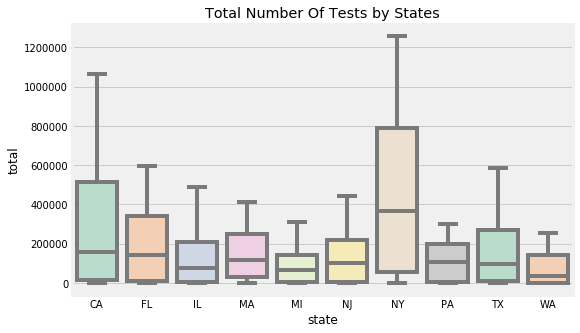

In [10]:
#Box-plot for average of total tests 
plt.figure(figsize=(8,5))
sns.boxplot(x = 'state', y = 'total', data = vis_df, palette='Pastel2')
plt.title("Total Number Of Tests by States")
plt.show()

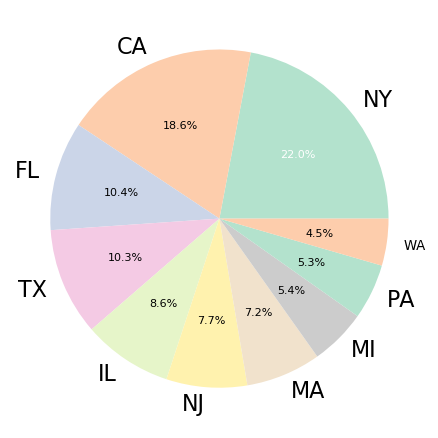

In [11]:
#Subsetting data
vis_df1 = vis_df.copy()
vis_df1.date = pd.to_datetime(vis_df1['date'], format='%Y%m%d')
vis_df1.date = vis_df1.date.max()
count_df = vis_df1.groupby(by=['date','state'])['total'].max().reset_index()
count_df.sort_values('total', ascending=False, inplace=True)
count_df = pd.DataFrame(count_df)

#Pie chart
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
patches, texts, autotexts = ax.pie(x=count_df.total, labels=count_df.state, 
       autopct='%1.1f%%',
      colors=sns.color_palette("Pastel2"))

plt.setp(texts, size=20)
plt.setp(autotexts, size='medium')
plt.setp(texts[-1], size='large')
autotexts[0].set_color('white')

plt.show()

Not to mislead you, this is a subset of the data, so the rates will differ. The statewise highest number of rates is still New York with 308,000 cases at the moment (May 1st). If you are wondering why CA is second biggest, well, this piechart is the sum of both positive and negative cases, not just positive cases.

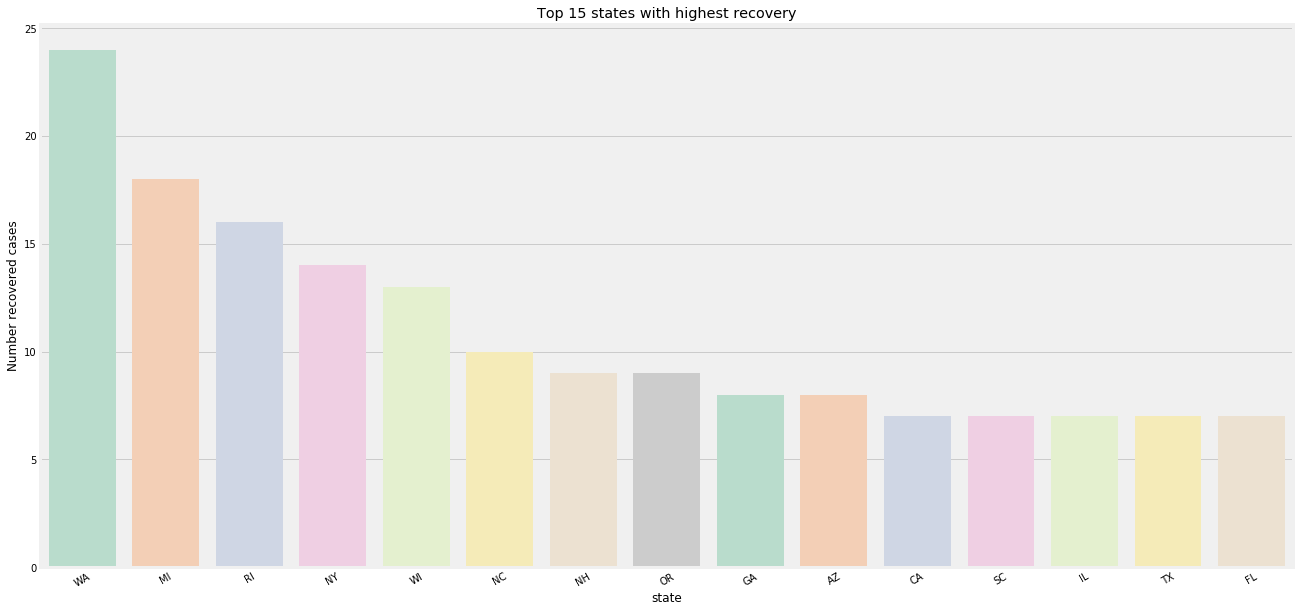

In [12]:
#barplot for statewise recovery
plt.figure(figsize=(20,10))

sns.barplot(x=df['state'].value_counts().nlargest(15).index, 
            y=df['recovered'].value_counts().nlargest(15), palette="Pastel2")

plt.xticks(rotation=30)
plt.title('Top 15 states with highest recovery')
plt.xlabel('state')
plt.ylabel('Number recovered cases')
plt.show()

We see a high recovery in WA. Today (27th April 2020), there are 508 patients hospitalized with COVID-19, and 145 of them are in intensive care in WA. according to KOMONEWS. This could be the reason the governor has announced gradual opening of economy.

In [13]:
# vis_df data is prone to misreported numbers or errors, we can smooth the reported positives by looking at 
# positive case growth every 2 days. credits: from the git hub repo. 
vis_df["positiveIncreaseLag"] = vis_df.groupby("state")["positiveIncrease"].shift(1)
vis_df["twoDayPositiveIncrease"] = vis_df["positiveIncrease"] + vis_df["positiveIncreaseLag"]
smoothed_vis_df = vis_df.loc[vis_df["date"] % 2 == 0]

# plot drop off
smoothed_vis_df["logPositiveNew"] = np.log(smoothed_vis_df["twoDayPositiveIncrease"])
smoothed_vis_df["logPositiveTotal"] = np.log(smoothed_vis_df["positive"])


# plot variables and settings
latest_update = str(smoothed_vis_df["date"].max())

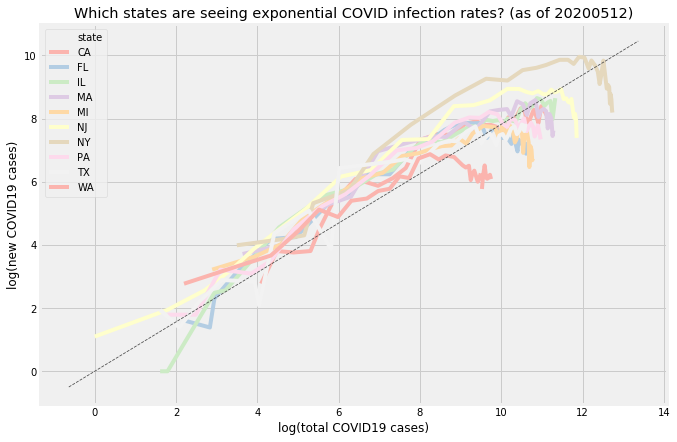

In [14]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(
    x="logPositiveTotal",
    y="logPositiveNew",
    hue="state",
    data=smoothed_vis_df,
    palette = 'Pastel1'
)

ax.set(
    xlabel="log(total COVID19 cases)",
    ylabel="log(new COVID19 cases)",
    title=f"Which states are seeing exponential COVID infection rates? (as of {latest_update})"
)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", lw=.8)
plt.show()

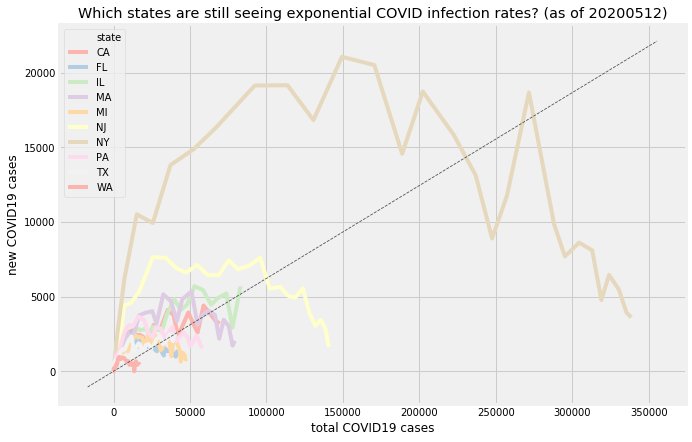

In [15]:
# linear-scale plot of growth rate v total (positives)
plt.figure(figsize=(10,7))
ax = sns.lineplot(
    x="positive",
    y="twoDayPositiveIncrease",
    hue="state",
    data=smoothed_vis_df,
    palette='Pastel1'
)

ax.set(
    xlabel="total COVID19 cases",
    ylabel="new COVID19 cases",
    title=f"Which states are still seeing exponential COVID infection rates? (as of {latest_update})"
)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", lw=.8)
plt.show()


We can see that the new covid cases for New York and New Jersey have crossed the peak point and are starting to decline slowly. However, the plot might seem a lot volatile at the moment as it has just started to decline and will take atleast a week to form a steady downfall.

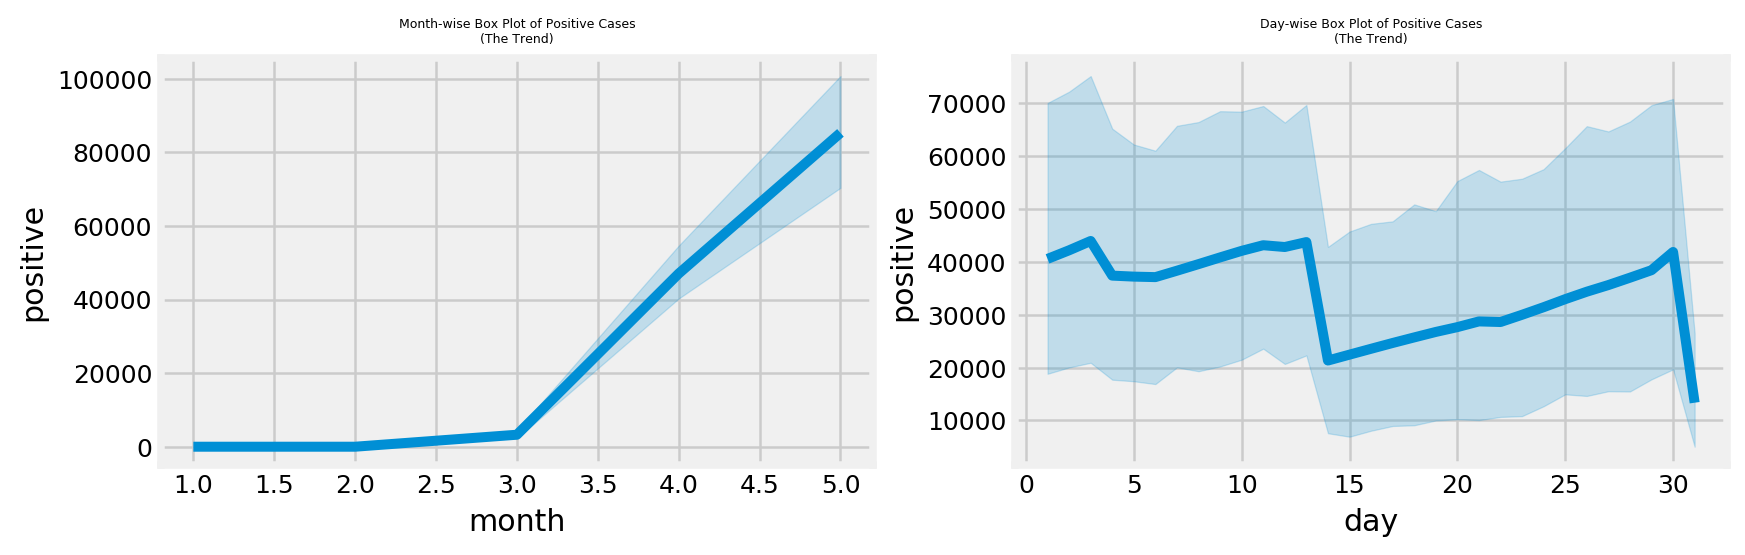

In [16]:
#drawing lineplots
fig, axes = plt.subplots(1, 2, figsize = (10,3), dpi = 180)
vis_df1= vis_df

vis_df1.date = pd.to_datetime(vis_df1['date'], format='%Y%m%d')
vis_df1['month'] = pd.DatetimeIndex(vis_df1['date']).month
vis_df1['day'] = pd.DatetimeIndex(vis_df1['date']).day

sns.lineplot(x = 'day', y = 'positive', data = vis_df1, ax = axes[1])
sns.lineplot(x = 'month', y = 'positive', data = vis_df1, ax = axes[0])

# Set Title
axes[0].set_title('Month-wise Box Plot of Positive Cases\n(The Trend)', fontsize = 5);
axes[1].set_title('Day-wise Box Plot of Positive Cases\n(The Trend)', fontsize = 5); 
plt.show()

We can clearly see the inflation in the boxplot from March to April and then May. However, they are claiming that the curve is flattening. Could be true as the number of tests increases, cases will proportionally increase too. What matters is the fatality rate and USA has done a great job in keeping it under most countries like Spain, UK etc. kudos to the health care workers and first responders!

For all you know, this pandemic could persist till next year or maybe even more. So, I have added an extra plot just the behavior of the plots can differ down the years.

**Data Modeling**

In [17]:
df.isnull().sum()

date                           0
state                          0
positive                      15
negative                     189
pending                     3147
hospitalizedCurrently       2275
hospitalizedCumulative      2316
inIcuCurrently              3051
inIcuCumulative             3547
onVentilatorCurrently       3209
onVentilatorCumulative      3771
recovered                   2432
dataQualityGrade            1106
lastUpdateEt                 373
hash                           0
dateChecked                    0
death                        726
hospitalized                2316
total                          0
totalTestResults               0
posNeg                         0
fips                           0
deathIncrease                 56
hospitalizedIncrease          56
negativeIncrease              56
positiveIncrease              56
totalTestResultsIncrease      56
dtype: int64

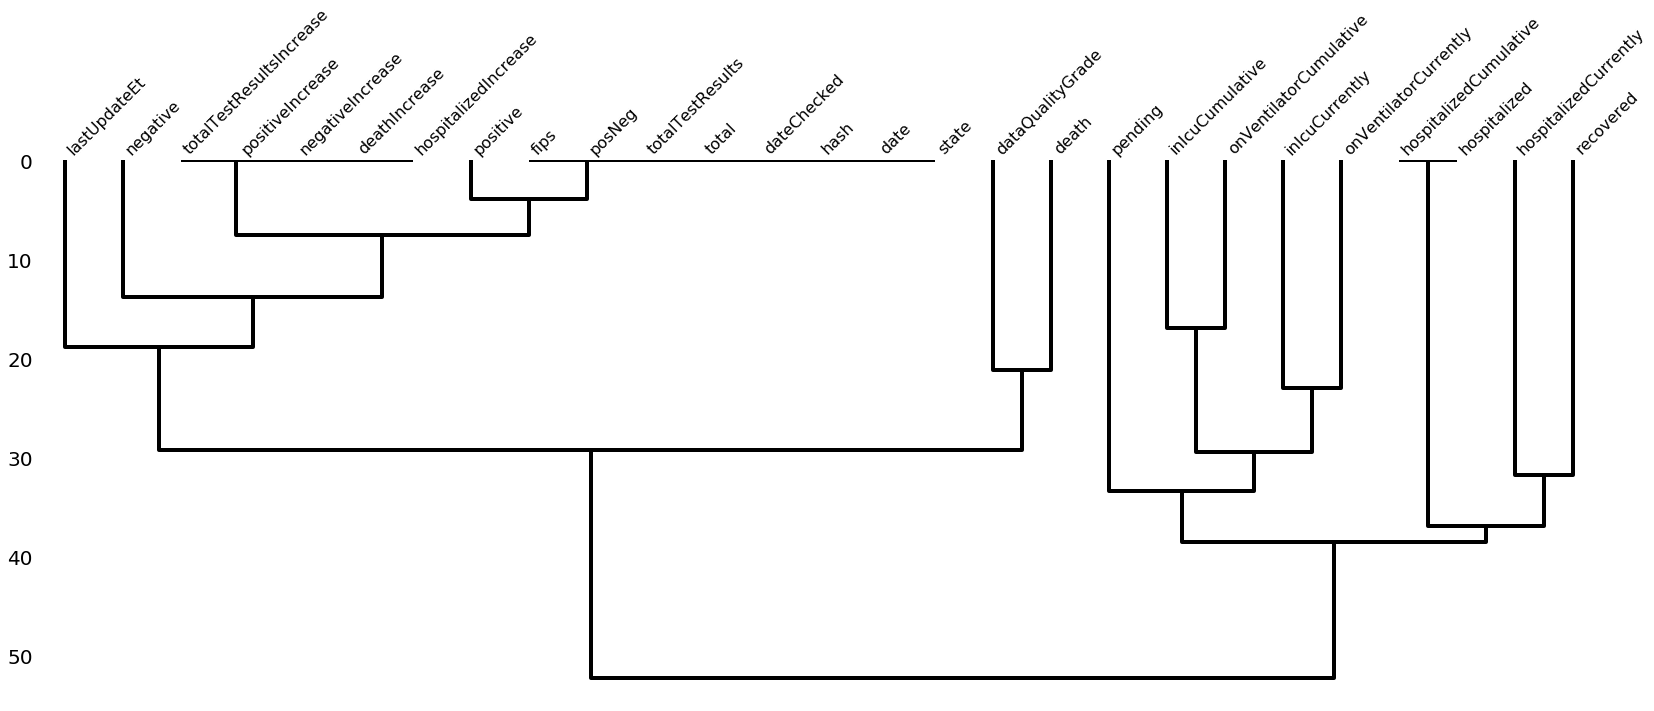

In [18]:
msno.dendrogram(df)

Lets drop columns that has a high number of null values

In [19]:
#Pivot the dataframe such that we have dates as columns, index as states and values as positive cases
dff = df.copy()
dff.date = pd.to_datetime(dff.date, format='%Y%m%d')
dff.date = pd.to_datetime(dff['date']).dt.date
dff = dff.pivot(index='state', columns='date', values='positive')
dff = dff.drop(dff.columns[:50], axis=1)
dff.drop('AS', inplace=True)
dff.head()

date,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,...,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13
state,,,,,,,,,,,,,,,,,,,,,
AK,0.0,1.0,1.0,1.0,1.0,3.0,6.0,6.0,12.0,14.0,...,370.0,371.0,372.0,374.0,377.0,378.0,379.0,381.0,383.0,383.0
AL,0.0,1.0,6.0,12.0,28.0,36.0,46.0,68.0,81.0,124.0,...,8025.0,8285.0,8581.0,8898.0,9221.0,9567.0,9777.0,10009.0,10310.0,10617.0
AR,6.0,9.0,12.0,16.0,22.0,22.0,33.0,46.0,96.0,118.0,...,3458.0,3496.0,3568.0,3611.0,3694.0,3747.0,3747.0,4034.0,4164.0,4164.0
AZ,9.0,9.0,12.0,12.0,18.0,20.0,28.0,44.0,65.0,104.0,...,8919.0,9305.0,9707.0,9945.0,10526.0,10960.0,11119.0,11380.0,11736.0,12176.0
CA,202.0,202.0,252.0,293.0,335.0,483.0,611.0,924.0,1063.0,1279.0,...,54937.0,56212.0,58815.0,60614.0,62512.0,64561.0,66680.0,67939.0,69382.0,71141.0


**ARIMA Forecasting Method**

In [20]:
#Predictions using ARIMA
predictions = []
train_dataset = dff
for row in tqdm(train_dataset[train_dataset.columns[-11:]].values[:57]):
    fit = ARIMA(row, order=(0,1,1)).fit()
    predictions.append(fit.predict())

print(fit.summary())
print('Residuals Description')
print(fit.resid)

df_preds = pd.DataFrame(predictions)
df_preds.index = dff.index
df_preds

100%|██████████| 55/55 [00:02<00:00, 19.80it/s]


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   10
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -33.060
Method:                       css-mle   S.D. of innovations              5.854
Date:                Wed, 13 May 2020   AIC                             72.120
Time:                        17:11:12   BIC                             73.028
Sample:                             1   HQIC                            71.124
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5545      0.558     18.909      0.000       9.461      11.649
ma.L1.D.y     -1.0000      0.453     -2.207      0.058      -1.888      -0.112
                                    Roots           

,0,1,2,3,4,5,6,7,8,9
state,,,,,,,,,,
AK,1.590909,1.386364,1.848485,2.227273,1.772727,0.568182,1.220779,1.784091,1.398990,1.050000e+00
AL,290.217124,293.197290,279.069726,295.962298,297.364738,298.927982,306.212446,257.523561,281.544064,2.968284e+02
AR,75.820067,86.300542,86.689958,79.133732,83.971847,76.039317,81.017776,94.097816,32.301004,5.377901e+01
AZ,354.654505,392.481757,358.975676,322.386262,422.163514,222.290767,173.189448,367.070272,448.939191,4.382998e+02
CA,1754.524213,1773.405460,1776.272482,1718.449254,1751.009313,1748.110149,1741.394628,1738.047081,1775.427841,1.769030e+03
CO,423.918263,430.877394,529.836525,478.545657,433.954788,-23.619414,381.387336,278.132182,205.369091,6.267504e+02
CT,579.763573,869.645359,270.193812,501.908932,350.090718,349.005837,387.768576,420.311077,765.817863,7.577996e+02
DC,153.566624,153.783312,152.377750,143.533312,193.139975,196.783312,158.895214,163.283312,112.425902,1.387833e+02
DE,179.909086,229.863630,277.818173,83.022716,117.527259,134.515136,152.922060,164.965889,221.656543,2.210000e+02


<Figure size 1080x576 with 0 Axes>

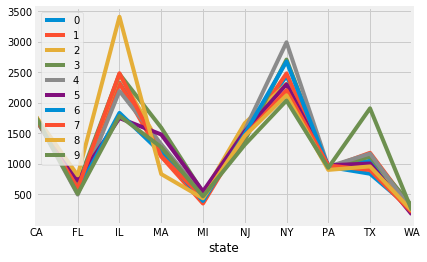

In [21]:
#Visualizing Predictions
plt.figure(figsize=(15,8))
df_vis_preds = df_preds.loc[df_preds.index.isin(['NY','CA', 'FL', 'TX', 'MA', 'NJ', 'IL', 'PA', 'MI', 'WA'])]
df_vis_preds.plot()
plt.show()

**FB Prophet Forecasting Method**

In [22]:
#Reformatting
df_ny = vis_df.loc[vis_df['state'].isin(['NY'])]
## Reset Index
df_ny = df_ny.reset_index(drop=True)
df_ny = df_ny[['date','positive']]
df_ny = df_ny.rename(index =str, columns={'date': 'ds', 'positive':'y'})
df_ny.head()

,ds,y
0,2020-05-13,340661.0
1,2020-05-12,338485.0
2,2020-05-11,337055.0
3,2020-05-10,335395.0
4,2020-05-09,333122.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(12.475000000000001, 0.5, '+ve Cases, CoV')

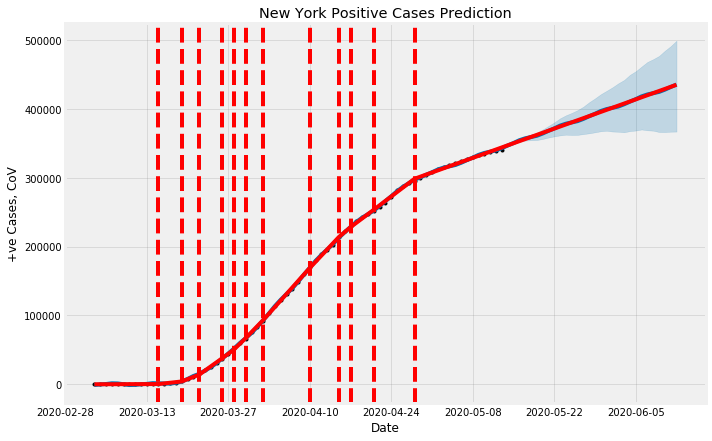

In [23]:
#Forecasting
prophet = Prophet()
prophet.fit(df_ny)
future = prophet.make_future_dataframe(periods=30, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.title('New York Positive Cases Prediction')
plt.xlabel('Date')
plt.ylabel('+ve Cases, CoV')

In [24]:
forecast[73:].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
73,2020-05-16,353394.366749,352277.042642,356536.787194,351561.206633,354670.509343,1307.045969,1307.045969,1307.045969,1307.045969,1307.045969,1307.045969,0.0,0.0,0.0,354701.412718
74,2020-05-17,356430.585410,354193.466848,359968.430295,353413.952173,358450.065594,1063.618944,1063.618944,1063.618944,1063.618944,1063.618944,1063.618944,0.0,0.0,0.0,357494.204355
75,2020-05-18,359466.804072,354801.784388,362977.166293,354953.920437,362424.725107,-106.489176,-106.489176,-106.489176,-106.489176,-106.489176,-106.489176,0.0,0.0,0.0,359360.314896
76,2020-05-19,362503.022734,355026.681192,365692.413935,356541.033981,366713.793376,-1290.288252,-1290.288252,-1290.288252,-1290.288252,-1290.288252,-1290.288252,0.0,0.0,0.0,361212.734482
77,2020-05-20,365539.241395,356594.323940,370288.889767,357847.895232,371188.018920,-1062.898352,-1062.898352,-1062.898352,-1062.898352,-1062.898352,-1062.898352,0.0,0.0,0.0,364476.343043


### Conclusion for part 1 of the project:
* The data was visualized for the top 10 countries that are affected, putting them in priority.
* Washington State's recovery level is comparatively higher to other states.
* New York is the highest affected state, however, the curve is starting to flatten from the peak.
* The positive cases for New York were forecasted using FB Prophet.
* The positive cases were forecasted using ARIMA model for a period of 30 days. 

#### Over all conclusion

* This project was used to predict the novel corona virus's positive cases and the presence of the virus in the chest image in minutes, which usually takes about hours to be determined using clinical test analysis.
* The model can be used to predict and help the doctor take measures in advance before the clinical test results arrive. The clinical analysis must be carried out for a confirmed 100% results as this involves life.
* The images for the covid-19 chest xrays were augmented for training purposes. The validation and test were carried out with real world chest-xray images of covid-19 victims.
* The model is learning through each epoch, and the accuracy of the training model is consistently increasing which shows a solid training model.
* Confusion matrix was plotted. The model is doing great with good ration of tp,tn>fp,fn.
* Visualizations using matplotlib, seaborn was showcased to get a better understanding of the current standing of the virus.
* The positive cases of New York was forecasted using using FB Prophet.
* The positive cases for all the states were forecasted using ARIMA model. 